# Welcome to the Plant Height Tutorial

Made by Eliza Seigel\
Updated April 21, 2025\
Code adapted from Keely Brown and Haley Schuhl

In [1]:
# Set the notebook display method.
%matplotlib widget

#Import libraries
from plantcv import plantcv as pcv
from plantcv.learn import train_kmeans
import plantcv.geospatial as geo
import os
import cv2
import napari

pcv.params.debug = "plot"

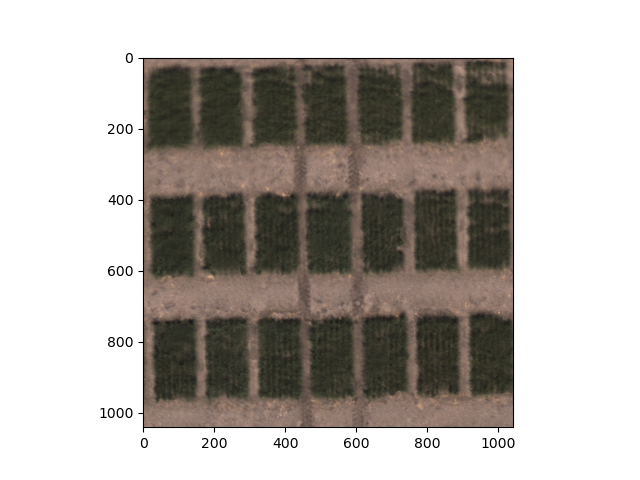

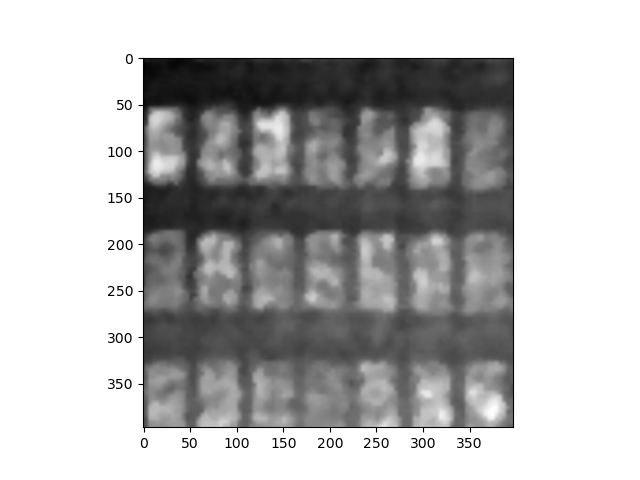

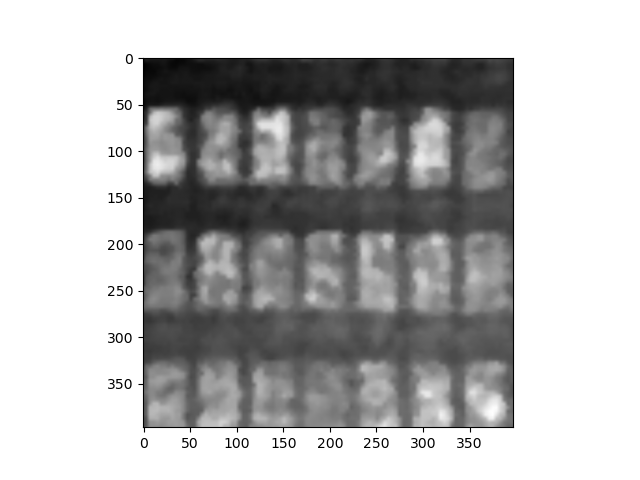

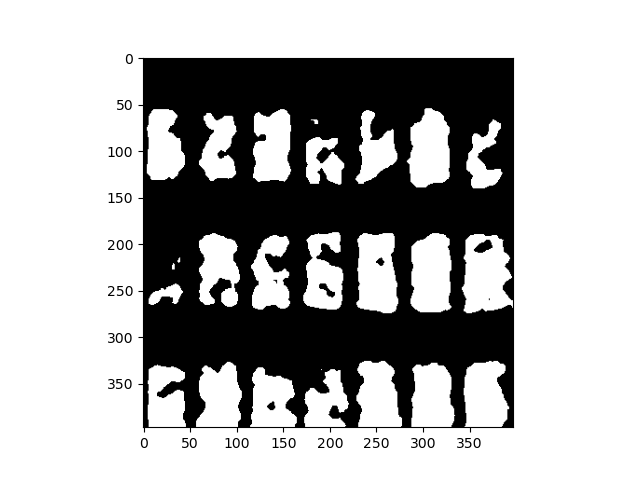

In [2]:
# First, we are going to read in the image we want to use. Make sure this is an RGB image.
geoimg = geo.read_geotif("tests/crop_bison_rgb.tif",
                     bands="r,g,b")

# Next we are going to read in the DSM that will be used in our function.
img, _, _ = pcv.readimage("tests/crop_bison_dsm.tif")

# We will transform the image so our functions can successfully read them in.
img = pcv.transform.rescale(gray_img = img, min_value=0, max_value=255)

# We will make a binary mask for the object.
plant_mask = pcv.threshold.binary(gray_img = img, threshold=125, object_type="light")

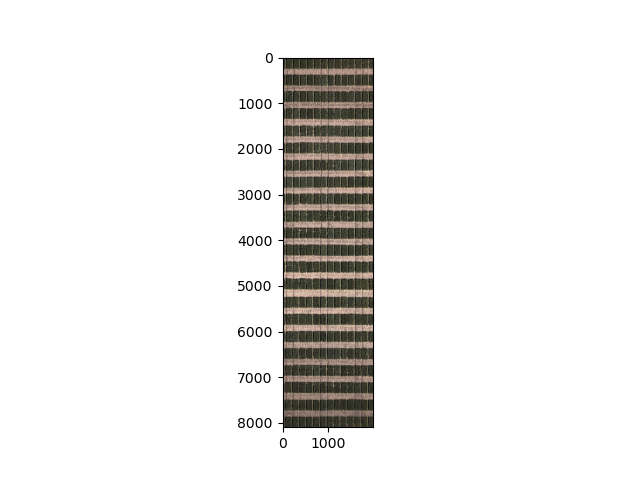

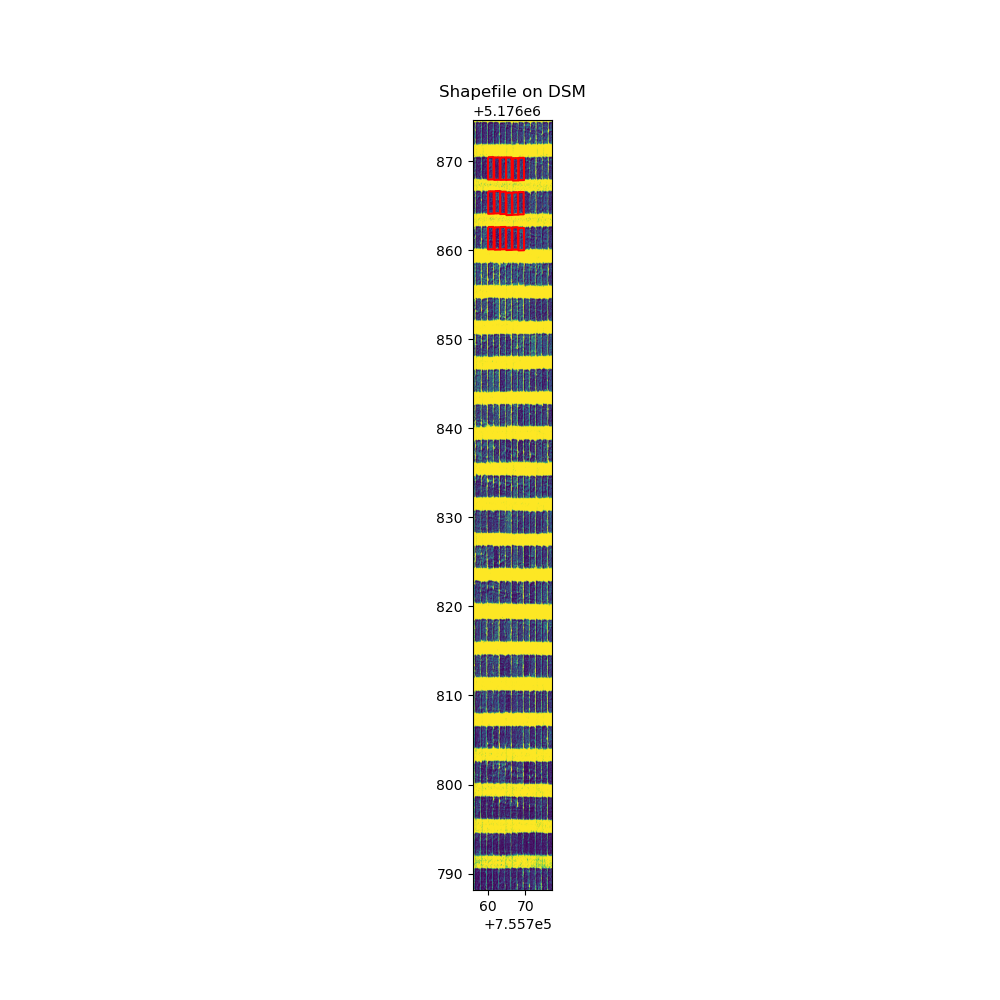

44.38299407958985


In [8]:
import plantcv.geospatial as gcv
import plantcv.plantcv as pcv

# Read geotif in.
dsm = gcv.read_geotif(filename="tests/crop_bison_rgb.tif", bands="R,G,B")

# Analyze height for each region in the geojson.
bounds = gcv.analyze.height_percentile(dsm=dsm, geojson="tests/gridcells-test.geojson", lower=25,upper=90, label="default")

# To access individual observation values:
print(pcv.outputs.observations["default_1"]["plant_height"]["value"])

#To save the outputs as a shapefile: 
# pcv.outputs.save_results(filename="/Users/Your_Username/Location/finalplots.geojson")
    
